 # EMISSION MAPPING FOR MULTISPECIES OF ATMOSPHERIC POLLUTANTS OVER THE CONUS

This project will explore how the emission varies spatially within the CONUS  for different species of atmospheric pollutants. For this purpose, it will analyze annual total emissions for VOCs, NOx, PM2.5, SO2, CO, and NH3 measured in terms of ton/km2/yr.


In [14]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import xesmf as xe

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
import cartopy.feature as feature
from cartopy.util import add_cyclic_point
import pandas as pd

### DATASET
Neighborhood Emission Mapping Operation : The NEMO (http://air.csiss.gmu.edu/) provides  annual, monthly and hourly fine scale emissions data at 1km spatial resolution. Here, I am working with the annual data of the year 2017.

In [15]:
path = '/groups/ESS3/qtong/data/nemo2017/'
fname = 'emis_mole_all_2017ann_US01_cmaq_cb6ae7_2017gb_17j_nosoaalk.ncf'
ds = xr.open_dataset(path+fname)
ds

<xarray.Dataset>
Dimensions:  (TSTEP: 1, VAR: 9, DATE-TIME: 2, LAY: 1, ROW: 3177, COL: 5397)
Dimensions without coordinates: TSTEP, VAR, DATE-TIME, LAY, ROW, COL
Data variables:
    TFLAG    (TSTEP, VAR, DATE-TIME) int32 ...
    VOCANN   (TSTEP, LAY, ROW, COL) float32 ...
    NOXANN   (TSTEP, LAY, ROW, COL) float32 ...
    COANN    (TSTEP, LAY, ROW, COL) float32 ...
    SO2ANN   (TSTEP, LAY, ROW, COL) float32 ...
    NH3ANN   (TSTEP, LAY, ROW, COL) float32 ...
    PM25ANN  (TSTEP, LAY, ROW, COL) float32 ...
    PECANN   (TSTEP, LAY, ROW, COL) float32 ...
    POCANN   (TSTEP, LAY, ROW, COL) float32 ...
    PMCANN   (TSTEP, LAY, ROW, COL) float32 ...
Attributes: (12/33)
    IOAPI_VERSION:  ioapi-3.2: $Id: init3.F90 185 2020-08-28 16:49:45Z coats ...
    EXEC_ID:        ????????????????                                         ...
    FTYPE:          1
    CDATE:          2022097
    CTIME:          190659
    WDATE:          2022097
    ...             ...
    VGLVLS:         [0. 0.]
    GDNAM:          US01            
    UPNAM:          ANNUAL_EMIS     
    VAR-LIST:       VOCANN          NOXANN          COANN           SO2ANN   ...
    FILEDESC:       Merged emissions output file from Mrggrid                ...
    HISTORY:

#### The geo registration data of this dataset which provides the  latitude and longitude coordinates;

In [16]:
path = '/home/aachar5/'
fname = 'GRID_LATLON_CENTRAL_US01.ncf'
ds_GRID = xr.open_dataset(path+fname)
ds_GRID

<xarray.Dataset>
Dimensions:  (TSTEP: 1, VAR: 2, DATE-TIME: 2, LAY: 1, ROW: 3177, COL: 5397)
Dimensions without coordinates: TSTEP, VAR, DATE-TIME, LAY, ROW, COL
Data variables:
    TFLAG    (TSTEP, VAR, DATE-TIME) int32 ...
    LAT      (TSTEP, LAY, ROW, COL) float32 ...
    LON      (TSTEP, LAY, ROW, COL) float32 ...
Attributes: (12/33)
    IOAPI_VERSION:  ioapi-3.2: $Id: init3.F90 185 2020-08-28 16:49:45Z coats ...
    EXEC_ID:        ????????????????                                         ...
    FTYPE:          1
    CDATE:          2022230
    CTIME:          160047
    WDATE:          2022230
    ...             ...
    VGLVLS:         [0. 0.]
    GDNAM:          US01            
    UPNAM:          OUTFILE         
    VAR-LIST:       LAT             LON             
    FILEDESC:       
    HISTORY:

### PROPOSED ANALYSIS
- I plan to use the data sets above to conduct the following analysis:
- Calculate annual mean and climatology of the emissions for the given species
- Calculate the anomaly in emission of PM2.5


In [17]:
ds_mean=ds.mean(dim='DATE-TIME')
ds

<xarray.Dataset>
Dimensions:  (TSTEP: 1, VAR: 9, DATE-TIME: 2, LAY: 1, ROW: 3177, COL: 5397)
Dimensions without coordinates: TSTEP, VAR, DATE-TIME, LAY, ROW, COL
Data variables:
    TFLAG    (TSTEP, VAR, DATE-TIME) int32 2017001 0 2017001 0 ... 0 2017001 0
    VOCANN   (TSTEP, LAY, ROW, COL) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    NOXANN   (TSTEP, LAY, ROW, COL) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    COANN    (TSTEP, LAY, ROW, COL) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    SO2ANN   (TSTEP, LAY, ROW, COL) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    NH3ANN   (TSTEP, LAY, ROW, COL) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    PM25ANN  (TSTEP, LAY, ROW, COL) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    PECANN   (TSTEP, LAY, ROW, COL) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    POCANN   (TSTEP, LAY, ROW, COL) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    PMCANN   (TSTEP, LAY, ROW, COL) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes: (12/33)
    IOAPI_VERSION:  ioapi-3.2: $Id: init3.F90 185 2020-08-28 16:49:45Z coats ...
    EXEC_ID:        ????????????????                                         ...
    FTYPE:          1
    CDATE:          2022097
    CTIME:          190659
    WDATE:          2022097
    ...             ...
    VGLVLS:         [0. 0.]
    GDNAM:          US01            
    UPNAM:          ANNUAL_EMIS     
    VAR-LIST:       VOCANN          NOXANN          COANN           SO2ANN   ...
    FILEDESC:       Merged emissions output file from Mrggrid                ...
    HISTORY:

In [18]:
ds_GRID

<xarray.Dataset>
Dimensions:  (TSTEP: 1, VAR: 2, DATE-TIME: 2, LAY: 1, ROW: 3177, COL: 5397)
Dimensions without coordinates: TSTEP, VAR, DATE-TIME, LAY, ROW, COL
Data variables:
    TFLAG    (TSTEP, VAR, DATE-TIME) int32 2017001 0 2017001 0
    LAT      (TSTEP, LAY, ROW, COL) float32 ...
    LON      (TSTEP, LAY, ROW, COL) float32 ...
Attributes: (12/33)
    IOAPI_VERSION:  ioapi-3.2: $Id: init3.F90 185 2020-08-28 16:49:45Z coats ...
    EXEC_ID:        ????????????????                                         ...
    FTYPE:          1
    CDATE:          2022230
    CTIME:          160047
    WDATE:          2022230
    ...             ...
    VGLVLS:         [0. 0.]
    GDNAM:          US01            
    UPNAM:          OUTFILE         
    VAR-LIST:       LAT             LON             
    FILEDESC:       
    HISTORY:

In [19]:
lats = ds_GRID['LAT'][0,0,:,:]
lons = ds_GRID['LON'][0,0,:,:]

In [ ]:
new_ds1 = ds.assign_coords({'lat':lats})
new_ds2 = new_ds1.assign_coords({'lon':lons})
new_ds2

<xarray.Dataset>
Dimensions:  (TSTEP: 1, VAR: 9, DATE-TIME: 2, LAY: 1, ROW: 3177, COL: 5397)
Coordinates:
    lat      (ROW, COL) float32 ...
    lon      (ROW, COL) float32 ...
Dimensions without coordinates: TSTEP, VAR, DATE-TIME, LAY, ROW, COL
Data variables:
    TFLAG    (TSTEP, VAR, DATE-TIME) int32 2017001 0 2017001 0 ... 0 2017001 0
    VOCANN   (TSTEP, LAY, ROW, COL) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    NOXANN   (TSTEP, LAY, ROW, COL) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    COANN    (TSTEP, LAY, ROW, COL) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    SO2ANN   (TSTEP, LAY, ROW, COL) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    NH3ANN   (TSTEP, LAY, ROW, COL) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    PM25ANN  (TSTEP, LAY, ROW, COL) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    PECANN   (TSTEP, LAY, ROW, COL) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    POCANN   (TSTEP, LAY, ROW, COL) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    PMCANN   (TSTEP, LAY, ROW, COL) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes: (12/33)
    IOAPI_VERSION:  ioapi-3.2: $Id: init3.F90 185 2020-08-28 16:49:45Z coats ...
    EXEC_ID:        ????????????????                                         ...
    FTYPE:          1
    CDATE:          2022097
    CTIME:          190659
    WDATE:          2022097
    ...             ...
    VGLVLS:         [0. 0.]
    GDNAM:          US01            
    UPNAM:          ANNUAL_EMIS     
    VAR-LIST:       VOCANN          NOXANN          COANN           SO2ANN   ...
    FILEDESC:       Merged emissions output file from Mrggrid                ...
    HISTORY:

In [ ]:
new_lat = np.arange(-90,90.5,0.5)
new_lon = np.arange(0,360,0.1)

ds_out = xr.Dataset({'lat':(['lat'],new_lat),
                     'lon':(['lon'],new_lon)
                    })
ds_out

<xarray.Dataset>
Dimensions:  (lat: 361, lon: 3600)
Coordinates:
  * lat      (lat) float64 -90.0 -89.5 -89.0 -88.5 -88.0 ... 88.5 89.0 89.5 90.0
  * lon      (lon) float64 0.0 0.1 0.2 0.3 0.4 ... 359.5 359.6 359.7 359.8 359.9
Data variables:
    *empty*

In [59]:
new_lat = np.arange(25,51,0.5)
new_lon = np.arange(-120,-69,0.1)

ds_out = xr.Dataset({'lat':(['lat'],new_lat),
                     'lon':(['lon'],new_lon)
                    })
ds_out

<xarray.Dataset>
Dimensions:  (lat: 52, lon: 510)
Coordinates:
  * lat      (lat) float64 25.0 25.5 26.0 26.5 27.0 ... 48.5 49.0 49.5 50.0 50.5
  * lon      (lon) float64 -120.0 -119.9 -119.8 -119.7 ... -69.3 -69.2 -69.1
Data variables:
    *empty*

In [60]:
var = 'PM25ANN'
regridder = xe.Regridder(new_ds2,ds_out,'bilinear')
dr_out = regridder(ds[var][0,0,:,:]).to_dataset(name=var)
dr_out.reset_coords()
dr_out

<xarray.Dataset>
Dimensions:  (lat: 52, lon: 510)
Coordinates:
  * lat      (lat) float64 25.0 25.5 26.0 26.5 27.0 ... 48.5 49.0 49.5 50.0 50.5
  * lon      (lon) float64 -120.0 -119.9 -119.8 -119.7 ... -69.3 -69.2 -69.1
Data variables:
    PM25ANN  (lat, lon) float32 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0

''

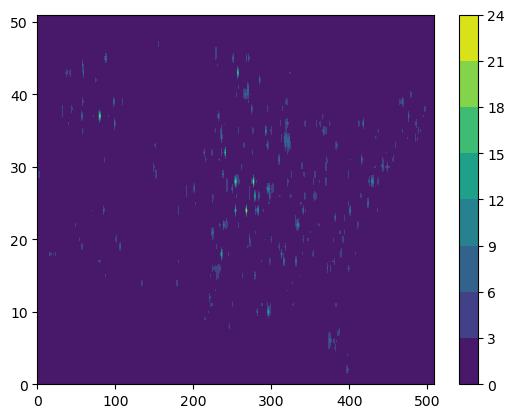

In [61]:
plt.contourf(dr_out['PM25ANN'][:,:])
plt.colorbar() 
;

''

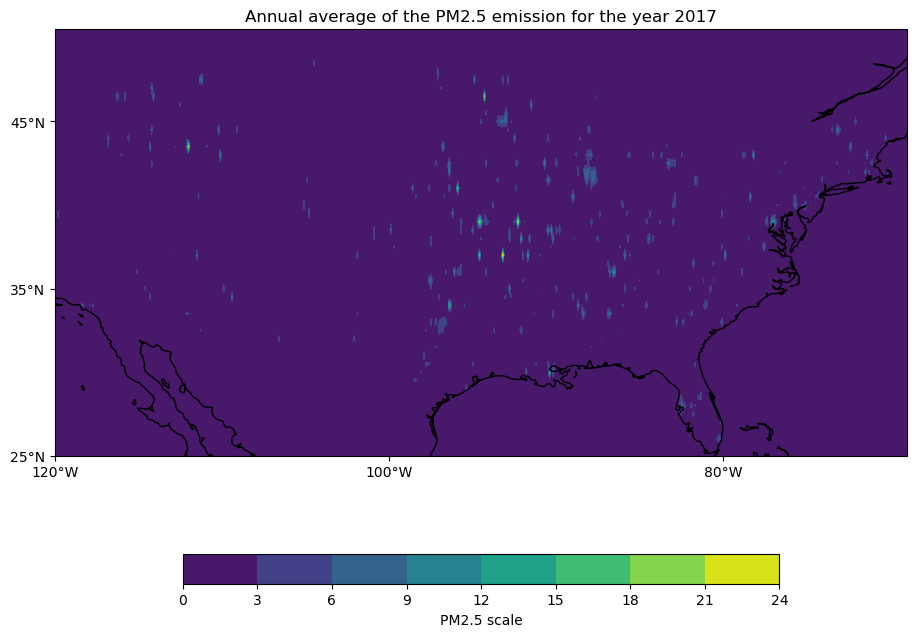

In [62]:
# Make the figure larger
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=dr_out['PM25ANN']
data, lons = add_cyclic_point(data, coord=dr_out['lon'])

# Make a filled contour plot
cs=ax.contourf(lons, dr_out['lat'], data,
            transform = ccrs.PlateCarree())

# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-120,-69,20), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(25,51,10), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter) 
;
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='PM2.5 scale')
plt.title('Annual average of the PM2.5 emission for the year 2017')
;
''

''

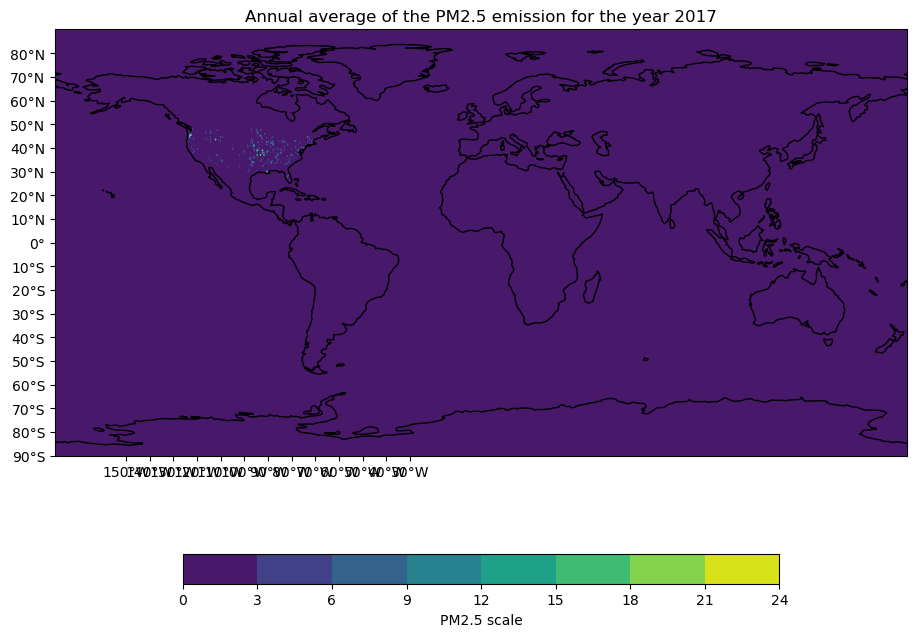

In [50]:
fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree())

# Add cyclic point to data
data=dr_out['PM25ANN']
data, lons = add_cyclic_point(data, coord=dr_out['lon'])

# Make a filled contour plot
cs=ax.contourf(lons, dr_out['lat'], data,
            transform = ccrs.PlateCarree())

# Add coastlines
ax.coastlines()

# Define the xticks for longitude
ax.set_xticks(np.arange(-150,-20,10), crs=ccrs.PlateCarree())
lon_formatter = cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define the yticks for latitude
ax.set_yticks(np.arange(-90,90,10), crs=ccrs.PlateCarree())
lat_formatter = cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter) 
;
cbar = plt.colorbar(cs,shrink=0.7,orientation='horizontal',label='PM2.5 scale')
plt.title('Annual average of the PM2.5 emission for the year 2017')
;
''